In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file = r'eCO2mix_RTE_Annuel-Definitif_2017.xlsx'
df = pd.read_excel(file)
#df.head()

df["DateTime"] = df["Date"] + ' ' + df["Heures"]
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M')
df['Fossiles'] = df['Fioul'] + df['Charbon'] + df['Gaz']
df['Renouv'] = df['Eolien'] + df['Solaire'] + df['Hydraulique'] + df['Bioenergies']

df['ProdTot'] = df['Nucleaire'] + df['Fossiles'] + df['Renouv']

df['NucleaireFrac'] = df['Nucleaire']/df['ProdTot']
df['RenouvFrac'] = df['Renouv']/df['ProdTot']
df['FossilesFrac'] = df['Fossiles']/df['ProdTot']

df2 = df.set_index('DateTime', inplace=False)
df3 = df2.dropna()
df3.head()

#cols = ['Perimetre', 'Nature', 'DateTime'] + [col for col in df if col != 'DateTime' and col != 'Perimetre' and col != 'Nature']
#df = df[cols]


,Perimetre,Nature,Date,Heures,Consommation,Prevision J-1,Prevision J,Fioul,Charbon,Gaz,...,HydrauliqueSTEPturbinage,BioenergiesDechets,BionergiesBiomasse,BionergiesBiogaz,Fossiles,Renouv,ProdTot,NucleaireFrac,RenouvFrac,FossilesFrac
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Donnees definitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,498.0,559.0,286.0,245.0,9360.0,7898.0,70786.0,0.756195,0.111576,0.132230
2017-01-01 00:30:00,France,Donnees definitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,533.0,559.0,285.0,256.0,8733.0,8330.0,70519.0,0.758037,0.118124,0.123839
2017-01-01 01:00:00,France,Donnees definitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,385.0,556.0,283.0,252.0,8480.0,7010.0,68921.0,0.775250,0.101711,0.123039
2017-01-01 01:30:00,France,Donnees definitives,2017-01-01,01:30,72682.0,73900.0,73900.0,587.0,1028.0,6595.0,...,427.0,558.0,285.0,256.0,8210.0,6881.0,68520.0,0.779758,0.100423,0.119819
2017-01-01 02:00:00,France,Donnees definitives,2017-01-01,02:00,72166.0,73300.0,73300.0,599.0,1024.0,6548.0,...,272.0,560.0,285.0,255.0,8171.0,6544.0,68096.0,0.783908,0.096100,0.119992


[Text(0,0.5,'Charbon9 (MW)'), Text(0.5,0,'Eolien (MW)')]

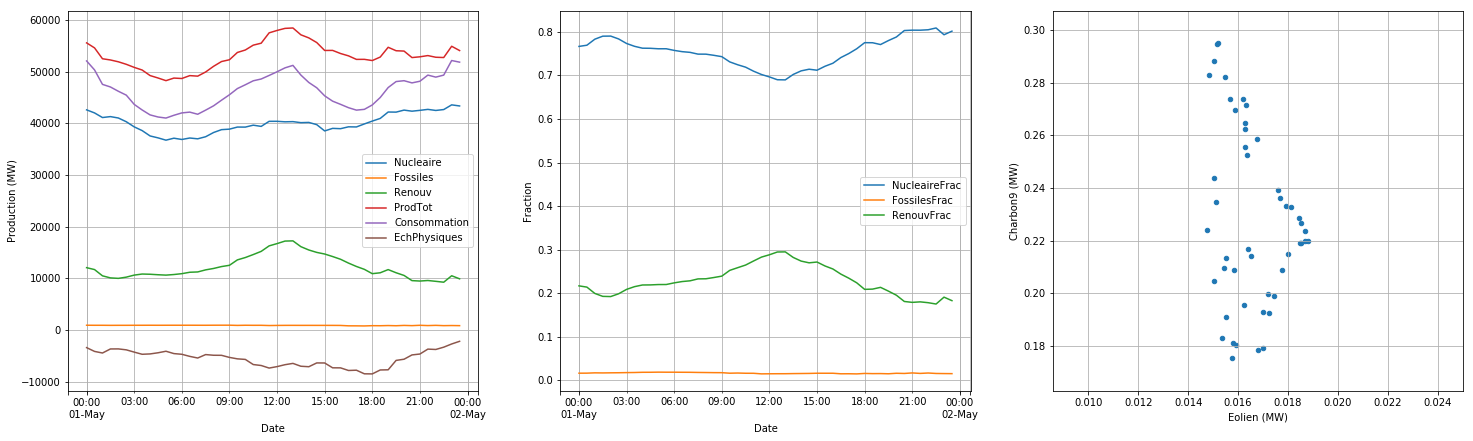

In [35]:
#df4 = df3.loc[:, 'Fioul' : 'Bioenergies']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,7))

df5 = df3['2017-05-01':'2017-05-01']
df5.plot(y=['Nucleaire', 'Fossiles', 'Renouv', 'ProdTot', 'Consommation', 'EchPhysiques'], grid=True, ax=axes[0])
axes[0].set(xlabel='Date', ylabel='Production (MW)')
axes[0].grid(True, which='minor', axis='x' )

df5.plot(y=['NucleaireFrac', 'FossilesFrac', 'RenouvFrac'], grid=True, ax=axes[1])
axes[1].set(xlabel='Date', ylabel='Fraction')
axes[1].grid(True, which='minor', axis='x' )

df5.plot.scatter(x='FossilesFrac', y='RenouvFrac', grid=True, ax=axes[2])
axes[2].set(xlabel='Eolien (MW)', ylabel='Charbon9 (MW)')

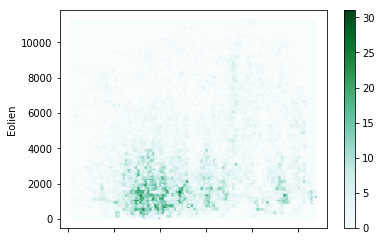

In [6]:
df.plot.hexbin(x='Nucleaire', y='Eolien', gridsize=100)